<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

## 9.3 Descriptive Statistics
### 9.3.2 Simple Descriptions of Multivariate Distributions
#### Example 9.1: Using “data projections” for simple data analysis

In [2]:
from mdsdata import DS1

X, y = DS1.load_data(return_X_y=True)
print(f"X has {X.shape[0]} rows and {X.shape[1]} columns.")

X has 150 rows and 4 columns.


In [3]:
# By only considering one variable, the other three “dimensions” are ignored, effectively
# projecting all data on the first variable.
X1 = X[:, 0]
X2 = X[:, 1]
X1.shape

(150,)

which shows that X1 is a vector with 150 records. We can now compute, e.g. the
mean of the first and the second variable:

In [4]:
import numpy as np
mean_X1 = np.mean(X1)
mean_X2 = np.mean(X2)
print("mean of X1:", mean_X1)
print("mean of X2:", mean_X2)

mean of X1: 5.843333333333334
mean of X2: 3.0540000000000003


### 9.3.4 The “Spread” of a Distribution – the Variance
#### Example 9.5: Measurement of the Speed Light (A. A. Michelsen, 1882)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('michelson.txt', skiprows=1)
velocity = data[:, 0] + 299000

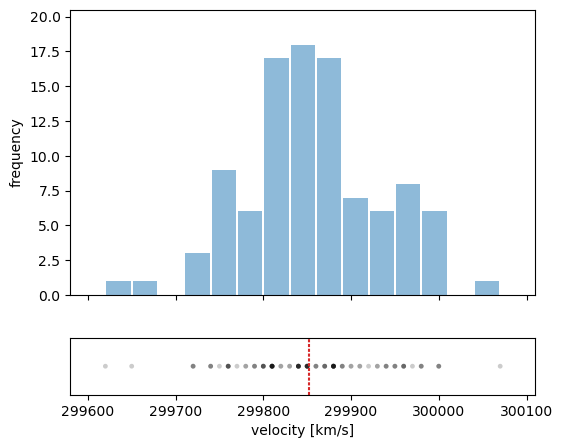

In [6]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 0.2], 'hspace': 0.25}, figsize=(6, 5), sharex=True)
ax[0].set(ylabel='frequency', ylim=(0, 20.5))
ax[0].hist(velocity, color='C0', alpha=0.5, bins=15, rwidth=0.93)

ax[1].scatter(velocity, np.zeros_like(velocity), alpha=0.2, s=12, edgecolors='none', color='k')
ax[1].set(yticks=[], xlabel='velocity [km/s]', xlim=(299580, 300110))
ax[1].axvline(velocity.mean(), color='C3', linewidth=1.5, dashes=(1.5, 0.8))

In [7]:
median = np.quantile(velocity, 0.5)
print("mean:  ", velocity.mean())
print("median:", median)

mean:   299852.4
median: 299850.0


### 9.3.5 Example: Summary Statistics of the Iris Dataset
Summary (or descriptive) statistics can be most easily obtained using `pandas`as follows:

In [8]:
from mdsdata import DS1

data = DS1.load_data(as_frame=True)
df = data.frame
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


If you want to stick with `numpy` and `scipy` (and no `pandas`) then here is another option:

In [62]:
from scipy import stats
from mdsdata import DS1

X, y = DS1.load_data(return_X_y=True)

for col in X.T:
    print(stats.describe(col))

DescribeResult(nobs=150, minmax=(4.3, 7.9), mean=5.843333333333334, variance=0.6856935123042507, skewness=0.3117530585022963, kurtosis=-0.5735679489249765)
DescribeResult(nobs=150, minmax=(2.0, 4.4), mean=3.0540000000000003, variance=0.1880040268456376, skewness=0.330702812773315, kurtosis=0.24144329938318343)
DescribeResult(nobs=150, minmax=(1.0, 6.9), mean=3.758666666666666, variance=3.1131794183445196, skewness=-0.2717119501716388, kurtosis=-1.3953593021397128)
DescribeResult(nobs=150, minmax=(0.1, 2.5), mean=1.1986666666666668, variance=0.582414317673378, skewness=-0.10394366626751729, kurtosis=-1.3352456441311857)
